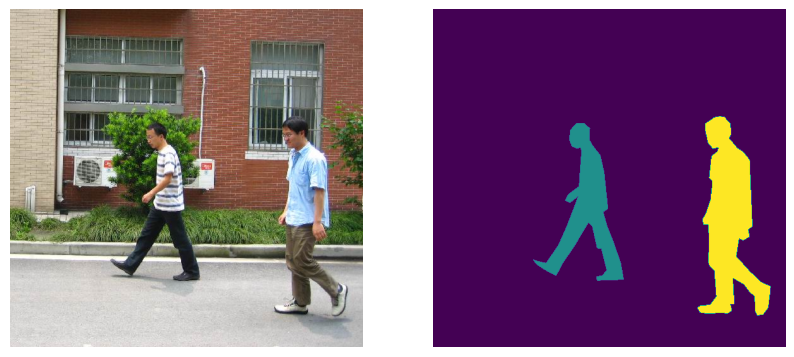

In [1]:
import os
import PIL.Image as Image
import matplotlib.pyplot as plt


data_path = '../../Data/PennFudanPed'
img_path = data_path + '/PNGImages'
lbl_path = data_path + '/PedMasks'

img_list = sorted(os.listdir(img_path))
lbl_list = sorted(os.listdir(lbl_path))

img = Image.open(os.path.join(img_path, img_list[0]))
lbl = Image.open(os.path.join(lbl_path, lbl_list[0]), mode='r')

plt.figure(figsize=(10,12))

plt.subplot(1,2,1)
plt.axis('off')
plt.imshow(img)

plt.subplot(1,2,2)
plt.axis('off')
plt.imshow(lbl)

In [2]:
from Dataset import PennFudanDataset

ds_train = PennFudanDataset()


In [3]:
img, target = ds_train.__getitem__(0)

In [4]:
target.keys()

dict_keys(['boxes', 'masks', 'labels', 'image_id', 'area', 'iscrowd'])

In [9]:
from Model.MaskRCNN import PreMaskRCNN, MaskRCNN_MobileNet_v2_bn
from torchinfo import summary


model = PreMaskRCNN()

summary(model, (2,3,512,512))

Layer (type:depth-idx)                                       Output Shape              Param #
PreMaskRCNN                                                  [100, 4]                  --
├─MaskRCNN: 1-1                                              [100, 4]                  --
│    └─GeneralizedRCNNTransform: 2-1                         [2, 3, 800, 800]          --
│    └─BackboneWithFPN: 2-2                                  [2, 256, 13, 13]          --
│    │    └─IntermediateLayerGetter: 3-1                     [2, 2048, 25, 25]         23,454,912
│    │    └─FeaturePyramidNetwork: 3-2                       [2, 256, 13, 13]          3,344,384
│    └─RegionProposalNetwork: 2-3                            [1000, 4]                 --
│    │    └─RPNHead: 3-3                                     [2, 3, 200, 200]          593,935
│    │    └─AnchorGenerator: 3-4                             [159882, 4]               --
│    └─RoIHeads: 2-4                                         [100, 4]      

In [8]:
model = MaskRCNN_MobileNet_v2_bn()

summary(model, (2,3,512,512))

Layer (type:depth-idx)                                  Output Shape              Param #
MaskRCNN_MobileNet_v2_bn                                [100, 4]                  --
├─MaskRCNN: 1-1                                         [100, 4]                  --
│    └─GeneralizedRCNNTransform: 2-1                    [2, 3, 800, 800]          --
│    └─Sequential: 2-2                                  [2, 1280, 25, 25]         --
│    │    └─Conv2dNormActivation: 3-1                   [2, 32, 400, 400]         928
│    │    └─InvertedResidual: 3-2                       [2, 16, 400, 400]         896
│    │    └─InvertedResidual: 3-3                       [2, 24, 200, 200]         5,136
│    │    └─InvertedResidual: 3-4                       [2, 24, 200, 200]         8,832
│    │    └─InvertedResidual: 3-5                       [2, 32, 100, 100]         10,000
│    │    └─InvertedResidual: 3-6                       [2, 32, 100, 100]         14,848
│    │    └─InvertedResidual: 3-7           